# S07 T01: Tasca del test d'hipòtesis
Aprende a realizar test de hipótesis con Python.
___

In [1]:
#import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as scipy
from scipy import stats

In [2]:
#import the dataset
nba_dataset = pd.read_csv('games_details.csv')
nba_dataset.head()

C:\Users\Usuario\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22100213,1610612764,WAS,Washington,203484,Kentavious Caldwell-Pope,Kentavious,F,NaN,27:41,...,1.0,5.0,6.0,2.0,1.0,0.0,1.0,0.0,3.0,2.0
1,22100213,1610612764,WAS,Washington,1628398,Kyle Kuzma,Kyle,F,NaN,30:28,...,1.0,4.0,5.0,3.0,1.0,2.0,1.0,1.0,5.0,-14.0
2,22100213,1610612764,WAS,Washington,1629655,Daniel Gafford,Daniel,C,NaN,24:21,...,2.0,7.0,9.0,1.0,2.0,1.0,1.0,4.0,20.0,-2.0
3,22100213,1610612764,WAS,Washington,203078,Bradley Beal,Bradley,G,NaN,35:07,...,0.0,3.0,3.0,7.0,2.0,0.0,2.0,3.0,24.0,-9.0
4,22100213,1610612764,WAS,Washington,203915,Spencer Dinwiddie,Spencer,G,NaN,28:34,...,0.0,3.0,3.0,2.0,0.0,0.0,2.0,1.0,0.0,-5.0


In [3]:
nba_dataset.info() #basic info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626111 entries, 0 to 626110
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   GAME_ID            626111 non-null  int64  
 1   TEAM_ID            626111 non-null  int64  
 2   TEAM_ABBREVIATION  626111 non-null  object 
 3   TEAM_CITY          626111 non-null  object 
 4   PLAYER_ID          626111 non-null  int64  
 5   PLAYER_NAME        626111 non-null  object 
 6   NICKNAME           10485 non-null   object 
 7   START_POSITION     239375 non-null  object 
 8   COMMENT            102359 non-null  object 
 9   MIN                523751 non-null  object 
 10  FGM                523751 non-null  float64
 11  FGA                523751 non-null  float64
 12  FG_PCT             523751 non-null  float64
 13  FG3M               523751 non-null  float64
 14  FG3A               523751 non-null  float64
 15  FG3_PCT            523751 non-null  float64
 16  FT

In [4]:
nba_dataset.isnull().sum() #search for null values

GAME_ID                   0
TEAM_ID                   0
TEAM_ABBREVIATION         0
TEAM_CITY                 0
PLAYER_ID                 0
PLAYER_NAME               0
NICKNAME             615626
START_POSITION       386736
COMMENT              523752
MIN                  102360
FGM                  102360
FGA                  102360
FG_PCT               102360
FG3M                 102360
FG3A                 102360
FG3_PCT              102360
FTM                  102360
FTA                  102360
FT_PCT               102360
OREB                 102360
DREB                 102360
REB                  102360
AST                  102360
STL                  102360
BLK                  102360
TO                   102360
PF                   102360
PTS                  102360
PLUS_MINUS           126021
dtype: int64

In [32]:
def str_to_number(time_str): #function to change the type of data
    if not isinstance(time_str, str):
        return 0
    minutes, *_ = [int(x) for x in time_str.split(':')]
    return minutes
nba_dataset.MIN = nba_dataset.MIN.apply(str_to_number)

In [5]:
#clean the dataset and null values
nba_dataset.update(nba_dataset[['MIN','PTS','FGM','FGA','FG_PCT','FG3M','FG3A','FG3_PCT','FTM', 'FTA', 'FT_PCT','OREB','DREB','REB','AST','STL','BLK','TO','PF','PLUS_MINUS']].fillna(0))
nba_dataset.drop(columns=['COMMENT', 'NICKNAME'], inplace=True)

In [6]:
nba_dataset.describe().round(2)

,GAME_ID,TEAM_ID,PLAYER_ID,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
count,626111.00,6.261110e+05,6.261110e+05,626111.00,626111.00,626111.00,626111.00,626111.00,626111.00,626111.00,...,626111.00,626111.00,626111.00,626111.00,626111.00,626111.00,626111.00,626111.00,626111.00,626111.00
mean,21645530.61,1.610613e+09,3.451868e+05,2.99,6.59,0.35,0.63,1.77,0.17,1.45,...,0.86,2.53,3.39,1.75,0.60,0.39,1.11,1.68,8.06,-0.00
std,5656109.87,8.650000e+00,7.461713e+06,3.06,5.94,0.28,1.14,2.44,0.27,2.25,...,1.34,2.70,3.52,2.39,0.93,0.81,1.37,1.56,8.17,9.48
min,10300001.00,1.610613e+09,1.500000e+01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-57.00
25%,20600922.00,1.610613e+09,2.419000e+03,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-5.00
50%,21200224.00,1.610613e+09,2.011440e+05,2.00,6.00,0.38,0.00,1.00,0.00,0.00,...,0.00,2.00,3.00,1.00,0.00,0.00,1.00,1.00,6.00,0.00
75%,21700202.00,1.610613e+09,2.030920e+05,5.00,10.00,0.52,1.00,3.00,0.33,2.00,...,1.00,4.00,5.00,3.00,1.00,1.00,2.00,3.00,13.00,4.00
max,52000211.00,1.610613e+09,1.962938e+09,28.00,50.00,1.00,14.00,24.00,1.00,26.00,...,18.00,25.00,31.00,25.00,10.00,12.00,12.00,15.00,81.00,57.00


## Nivel 1
- Ejercicio 1: <br>
Coge un conjunto de datos de tema deportivo que te guste y selecciona un atributo del conjunto de datos. Calcula el p-valor y di si rechaza la hipótesis nula cogiendo un alfa de 5%. 
___


Para el hyphotesis testing he comenzado realizando un test de normalidad de Shapiro-wilk, el cual evalua una muestra de los datos y cuantifica que tan probable es que los datos tengan una distribucion de campana de Gauss (*Este test es considerado entre los de mayor fiabilidad*)
<br> <br>
Se empieza el hyphotesis testing con un test de normalidad y se selecciona el atributo 'PTS' (puntos realizados por jugador):<br>
- **Null hypothesis (H0):** the sample has a Gaussian distribution 
- **Alternative hypothesis(Ha):** the sample does not have a Gaussian distribution
- **p-value:** to be calculated
- **Alpha:** 5%

<br>

*If the P-value is Greater than the Alpha, Do not Reject the Null*

<br>

Source:*https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/*

In [ ]:
from scipy.stats import shapiro

In [34]:
data_sample = nba_dataset.sample(400) #sample size recovered from data_sampling sprint

In [70]:
nba_points = data_sample.PTS
stat, p = shapiro(nba_points)
print('stat={}, p={}'.format(stat, p))

if p > 0.05:
    print('Gaussian distribution')
else:
    print('not Gaussian distribution')

stat=0.8848692178726196, p=9.857840246805982e-17
not Gaussian distribution


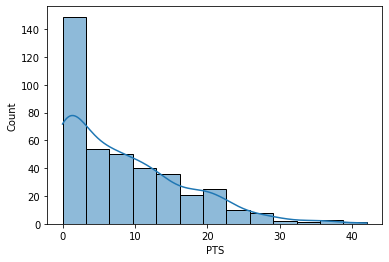

In [67]:
norm_test = sns.histplot(data=nba_points, kde=True)

El ***p-value*** no es mayor que ***alpha***, por lo que se rechaza la Hipotesis inicial.
<br> <br> 
Ademas, se observa en el histograma como la distribución de los datos se encuentra acumulada sobre la izquierda, por lo que se confirma graficamente que no tenemos una distribución de Gauss normal.


## Nivel 2
- Ejercicio 2: <br>
Continúa con el conjunto de datos de tema deportivo que te guste y selecciona otros dos atributos del conjunto de datos. Calcula los p-valores y di si rechazan la hipótesis nula cogiendo un alfa de 5%.
___
Primero se han tomado las dos variables a analizar: puntos anotados y minutos jugados, y se realiza un grafico para observar los datos de la muestra y asi poder decidir que tipo de metodo se utilizara para el testeo de la hipotesis.

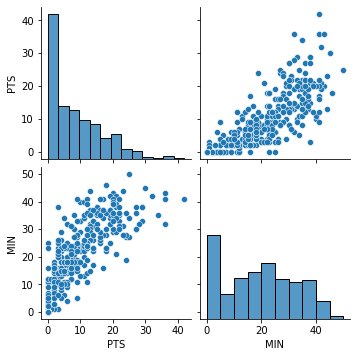

In [64]:
pairplot = sns.pairplot(data_sample, vars={'PTS', 'MIN'})

In [69]:
nba_mins = data_sample.MIN
stat_1, p_1 = shapiro(nba_mins)
print('stat_1={}, p_1={}'.format(stat_1, p_1))

if p_1 > 0.05:
    print('Gaussian distribution')
else:
    print('not Gaussian distribution')

stat_1=0.9418548941612244, p_1=2.0791477914339218e-11
not Gaussian distribution


En el ejercicio 1 se ha identificado que la variable 'PTS' no tiene una distribucion normal. Ahora hemos realizado esta misma prueba a la variable 'MIN', y se observa que tampoco tiene una distribucion normal. Asimismo, en el grafico se observa esta distribucion y que las variables tienen relacion, para lo cual la documentación nos indica: 
<br> 
<br> **If** Data Is Gaussian:
<br> 	*Use Parametric Statistical Methods*
<br> **Else**:
<br> 	*Use Nonparametric Statistical Methods*

<br>
Entre los metodos Nonparametric statistical tenemos el metodo de *Spearman Rank Correlation*, el cual utilizaremos para cuantificar la relacion entre las variables analizadas.

<br>

Por lo que, ahora se calcula la correlacion de dos variables: puntos anotados (PTS) y minutos jugados (MIN) de cada jugador.
<br>

- **Null hypothesis (H0):** the two variables are independent (los puntos realizados tienen relacion con los minutos jugados)
- **Alternative hypothesis(Ha):** the two variables are not independent (los puntos realizados **no** tienen relacion con los minutos jugados)
- **p-value:** to be calculated
- **Alpha:** 5%

<br> Source:
*https://machinelearningmastery.com/how-to-calculate-nonparametric-rank-correlation-in-python/*

In [28]:
from scipy.stats import spearmanr

In [72]:
data1 = nba_points
data2= nba_mins
stat_2, p_2 = spearmanr(data1, data2)
print('stat_2={}, p_2={}'.format (stat_2, p_2))
if p > 0.05:
    print('Variables are uncorrelated (fail to reject H0) p=%.3f' % p_2)
else:
    print('Variables are correlated (reject H0) p=%.3f' % p_2)

stat_2=0.881044256200883, p_2=1.8344979498077912e-131
Variables are correlated (reject H0) p=0.000


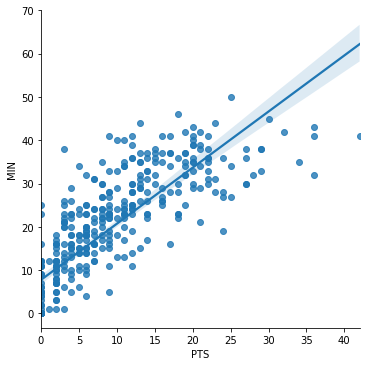

In [45]:
corr_fig = sns.lmplot(x= 'PTS', y= 'MIN', data=data_sample )

En el testeo de hipotesis de este ejercicio, tambien se rechaza la hipotesis nula (H0) pues p < alpha y se observa que las variables son dependientes y tienen una relacion monotonica.

In [52]:
#calculate of the correlation
corr_min_pts= round(data_sample['MIN'].corr(data_sample['PTS']),2)
print('La correlacion entre las variables minutos y puntos es de: {}'.format(corr_min_pts))

La correlacion entre las variables minutos y puntos es de: 0.81


## Nivel 3
- Ejercicio 3: <br>
Continúa con el conjunto de datos de tema deportivo que te guste y selecciona tres atributos del conjunto de datos. Calcula el p-valor y di si rechaza la hipótesis nula cogiendo un alfa de 5
___
Ahora se seleccionan las variables: puntos anotados (PTS), minutos jugados (MIN) y numero de tiros de campo intentados (FGA).

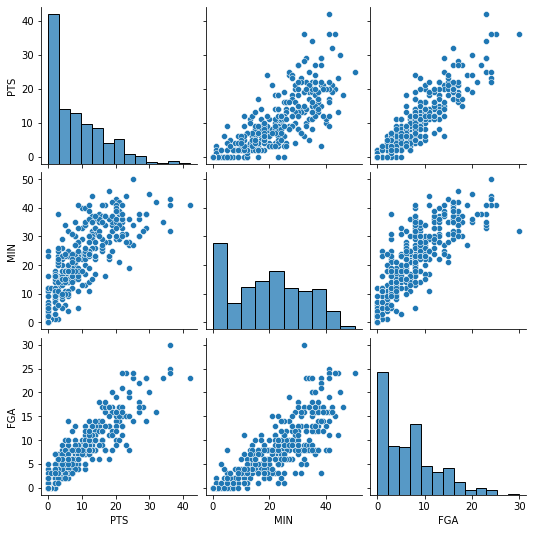

In [77]:
pairplot_2 = sns.pairplot(data_sample, vars={'PTS', 'MIN','FGA'})

Realizando un test de normalidad de la variable a incorporar en el analisis (FGA), se observa que esta no tiene una distribucion normal y que, de acuerdo con el scatterplot, es probable que tenga una relacion con las variables MIN y PTS.

Cuando se tienen mas de dos variables que aparentemente podrian estar relacionadas, utilizamos el *Friedman Test* para comprobar la hipotesis, donde:

- **Null hypothesis (H0):** La distribucion de las variables es equivalente
- **Alternative hypothesis(Ha):** La distribucion de una o más variables no es equivalente
- **p-value:** to be calculated
- **Alpha:** 5%


In [80]:
from scipy.stats import friedmanchisquare
data3 = nba_fga
stat_4, p_4 = friedmanchisquare(data1,data2,data3)
print('stat=%.3f, p=%.3f' % (stat_4, p_4))
if p > 0.05:
    print('Probably the same distribution (fail to reject H0)')
else:
    print('Probably different distributions (reject H0)')

stat=493.243, p=0.000
Probably different distributions (reject H0)


Para este primer testeo de hipotesis se rechaza la hipotesis de que las variables tienen la misma distribución. Y se procede a revisar si la variable "FGA" tiene una distribucion normal, para proceder a decidir que otro metodo se puede utilizar:

In [159]:
nba_fga = data_sample.FGA #check if fga is normal distributed
stat_3, p_3 = shapiro(nba_fga)
print('stat={}, p={}'.format(stat_3, p_3))

if p_3 > 0.05:
    print('Gaussian distribution')
else:
    print('not Gaussian distribution')

stat=0.9064182043075562, p=5.348019915780251e-15
not Gaussian distribution


Como ninguna de las variables tiene una distribucion normal, se procede a realizar ahora un analisis con el metodo de testeo de hipotesis anterior "Spearman Rank Correlation".
- **Null hypothesis (H0)**: the 3 variables are independent
- **Alternative hypothesis(Ha)**: the 3 variables are not independent
- **p-value**: to be calculated
- **Alpha**: 5%

In [108]:
df_nba = data_sample[['PTS','MIN','FGA']]
r_spearman_1, p_spearman_1 = stats.spearmanr(df_nba,axis=0)

In [109]:
#I will convert the array in a DF, just for better visuals
p_spearman_1_df = pd.DataFrame(p_spearman_1,columns=["MIN", "PTS","FGA"])
p_spearman_1_df.rename(index={0: "MIN", 1: "PTS", 2:"FGA"},inplace=True)

<AxesSubplot:>

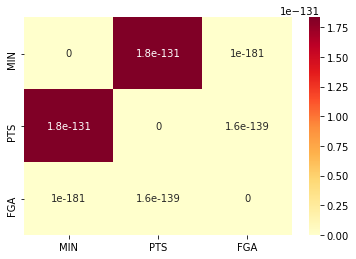

In [134]:
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(p_spearman_1_df, cmap='YlOrRd', annot=True)

In [135]:
p_spearman_1_df

,MIN,PTS,FGA
MIN,0.000000e+00,1.834498e-131,1.026632e-181
PTS,1.834498e-131,0.000000e+00,1.556229e-139
FGA,1.026632e-181,1.556229e-139,0.000000e+00


In [163]:
var=["MIN", "PTS","FGA"]
for i in range(3):
    for j in range(3):
        if i != j :
            p_1_attr = p_spearman_1_df.iloc[i,j]
            if p_1_attr > 0.05:
                print(var[i]," vs ",var[j],
                      ': Variables are uncorrelated (fail to reject H0), p value = {}'.format(p_1_attr))
            else:
                print(var[i]," vs ",var[j],
                      ': Variables are correlated (reject H0), p value = {}'.format(p_1_attr))

MIN  vs  PTS : Variables are correlated (reject H0), p value = 1.8344979498077912e-131
MIN  vs  FGA : Variables are correlated (reject H0), p value = 1.026631945278658e-181
PTS  vs  MIN : Variables are correlated (reject H0), p value = 1.8344979498077912e-131
PTS  vs  FGA : Variables are correlated (reject H0), p value = 1.5562286439733562e-139
FGA  vs  MIN : Variables are correlated (reject H0), p value = 1.0266319452789497e-181
FGA  vs  PTS : Variables are correlated (reject H0), p value = 1.5562286439733562e-139


En el testeo de hipotesis de este ejercicio, tambien se rechaza la hipotesis nula(H0) del test de Spearman, pues p < alpha para todas las variables y se observa que las variables tienen una relacion monotonica.